In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('titanic_train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df.drop(columns=["Name", "Ticket"])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
df = df.set_index("PassengerId")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


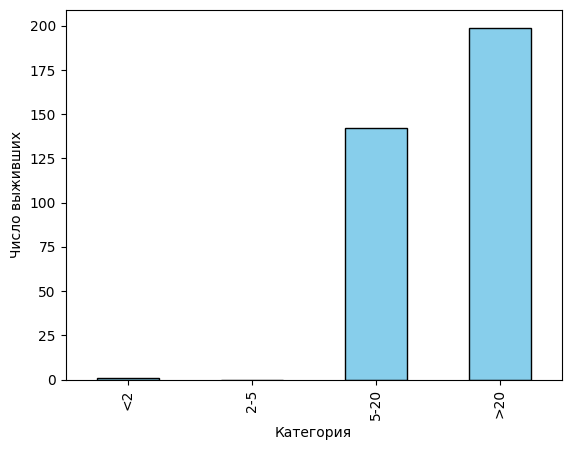

In [17]:
df['Fare_Category'] = pd.cut(
    df['Fare'],
    bins=[-1, 2, 5, 20, float('inf')],
    labels=['<2', '2-5', '5-20', '>20'],
)
survived_counts = df[df['Survived'] == 1].groupby('Fare_Category', observed=False).size()

survived_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Категория')
plt.ylabel('Число выживших')
plt.show()

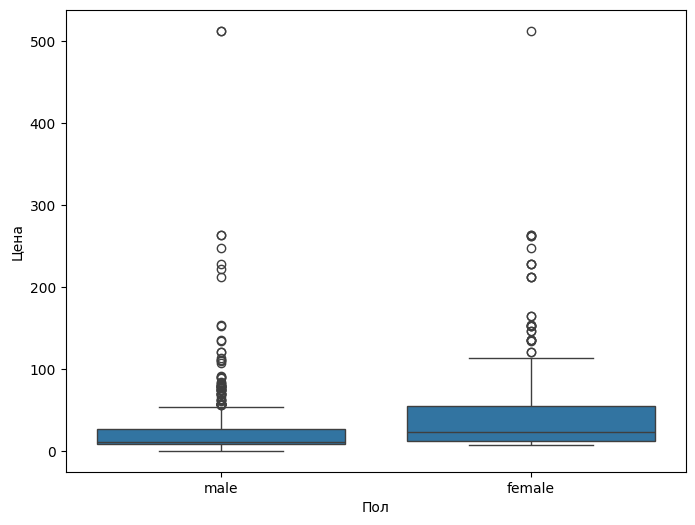

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Fare", data=df)
plt.xlabel("Пол")
plt.ylabel("Цена")
plt.show()

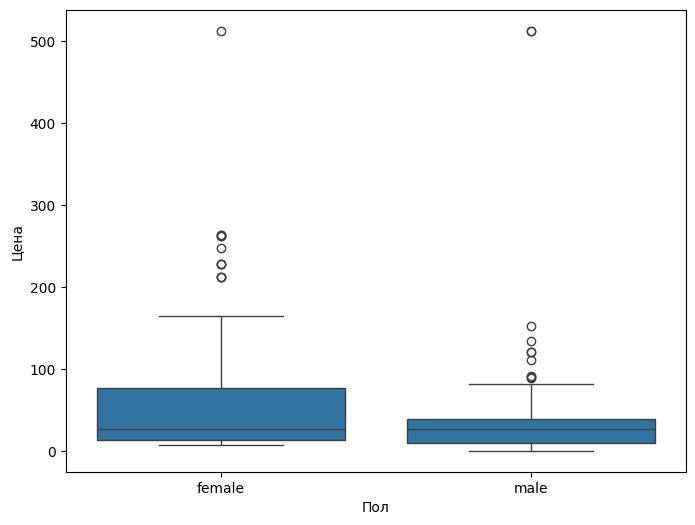

In [19]:
survived_df = df[df["Survived"] == 1]

plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Fare", data=survived_df)
plt.xlabel("Пол")
plt.ylabel("Цена")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoder = LabelEncoder()
df_encoded['Sex'] = label_encoder.fit_transform(df_encoded['Sex'])
df_encoded['Embarked'] = label_encoder.fit_transform(df_encoded['Embarked'].astype(str))

df_encoded.to_csv("train1.csv", index=False)

In [21]:
df_onehot = df.copy()

df_onehot = pd.get_dummies(df_onehot, columns=['Sex', 'Embarked'], drop_first=True)
df_onehot.to_csv("train2.csv", index=False)

In [16]:
df_copy = df.copy()

train_size = int(0.8 * len(df_copy))

train_data = df_copy.sample(n=train_size)
test_data = df_copy.drop(train_data.index)

train_data.to_csv("train3.csv", index=False)
test_data.to_csv("train4.csv", index=False)